##  Exploring the ratings of restaurants in India

Zomato is a restaurant reviews aggregator site which provides a platform for restaurant goers to review various restaurants they have visited. This data has been obtained from Kaggle datasets.



In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the Data

In [160]:
#reading the csv file
data = pd.read_csv('zomato.csv', encoding = "ISO-8859-1")

In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,4.394000e+03,4394.000000,4394.000000,4394.000000,4394.000000,4393.000000,4393.000000,4393.000000
mean,9.028446e+06,27.283113,55.376435,25.872748,615.405781,1.951286,2.979308,231.038470
std,8.745323e+06,69.219163,54.565049,10.493219,612.208456,0.932071,1.400966,566.592104
min,5.300000e+01,1.000000,-157.948486,-38.634746,0.000000,1.000000,0.000000,0.000000
25%,3.017282e+05,1.000000,77.028818,28.434658,250.000000,1.000000,2.800000,10.000000
50%,5.600960e+06,1.000000,77.111097,28.532494,450.000000,2.000000,3.400000,53.000000
75%,1.831196e+07,1.000000,77.238927,28.634848,787.500000,3.000000,3.900000,202.000000
max,1.850065e+07,216.000000,153.593331,52.008289,7000.000000,4.000000,4.900000,10934.000000


In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [157]:
#reading the country code file for filtering India from it
country_code = pd.read_excel('Country-Code.xlsx')

In [156]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


### Let's have a look at the restaurants in India

We need to get the country code of India first. Although we see that directly here that the country code is 1 for India, it would be a good exercise to try to extract it from the data at hand.

In [158]:
#filtering india from the dataframe Country_Code
country_code[country_code['Country'] == 'India']['Country Code']

0    1
Name: Country Code, dtype: int64

Thus the country code is 1, it is possible to find the country code of any other country using the above command.

In [161]:
#making a dataframe "data_india" with country code == 1
data_india = data[data['Country Code'] == 1]

In [162]:
data_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


#### Finding the list of cuisines available in Indian restaurants

In [164]:
#getting unique values of Cuisines in the data frame.
data_india['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Continental, Seafood, Chinese, North Indian, Biryani',
       'Burger, Pizza, Biryani',
       'American, North Indian, Thai, Continental'], dtype=object)

#### Total no of cuisines

In [165]:
#number of unique values
data_india['Cuisines'].nunique()

1392

#### Total no. of restaurants in India

In [166]:
#number of unique values in Restaurant ID column
data_india['Restaurant ID'].nunique()

8652

In [167]:
#getting Columns of the dataframe
data_india.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### What are we looking for?

As we go along with the analysis we will try to find out what factors influences the ratings of the restaurants. The ability to book a table, for example what might influence how a potential customer leaves a rating. Another important factor would be the authenticity of the cuisine being served. As a general rule of thumb one might say that a multi-cuisine restaurant might be less authentic than one that serves only one type of cuisine. I will try to cover such aspects in this analysis:

In [168]:
#setting plotting parameters such as scaling and size of the fonts and figures
sns.set(font_scale=1.2, rc={'figure.figsize':(8,5)})

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

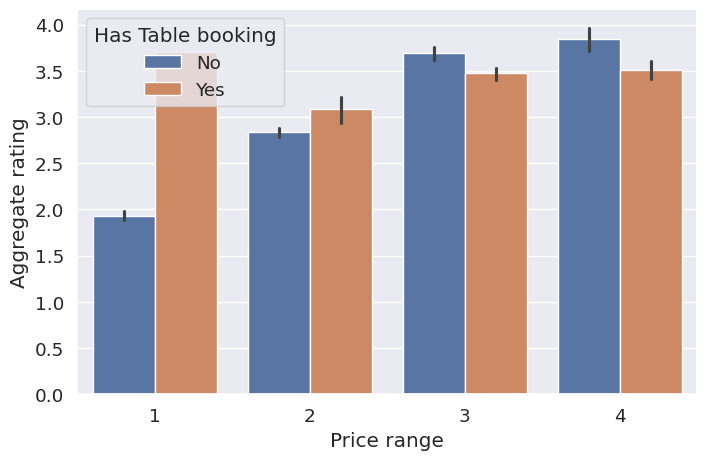

In [169]:
#Ploting a graph for price range to aggregate ratings on the basis of restaurants having table bookings.
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Table booking', data=data_india)

It seems that for restaurants that are more affordable (has a lower price range) have higher ratings if they provide table booking services.For pricier restaurants table booking option does not seem to affect the ratings much.

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

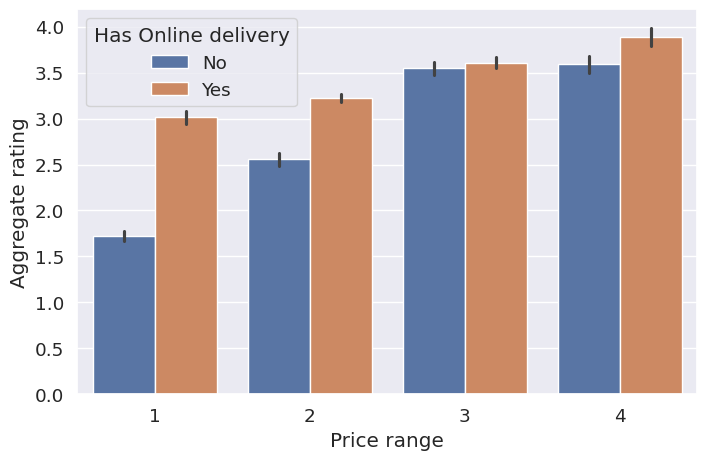

In [170]:
#ploting a graph for price range and aggregate rating on the basis of having online delivery.
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Online delivery', data=data_india)

Again for restaurants that are in the lower price range (1 and 2) seems to have better average rating if they provide online delivery services. This is not so signficant for the restaurants falling in the pricier category.

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

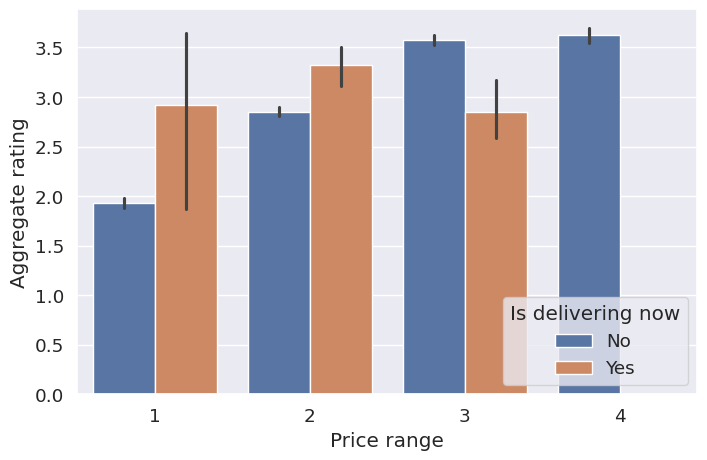

In [172]:
#ploting a graph for price range and aggregate rating on the basis of restaurants delivering orders now.
sns.barplot(x="Price range", y='Aggregate rating', hue='Is delivering now', data=data_india)

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

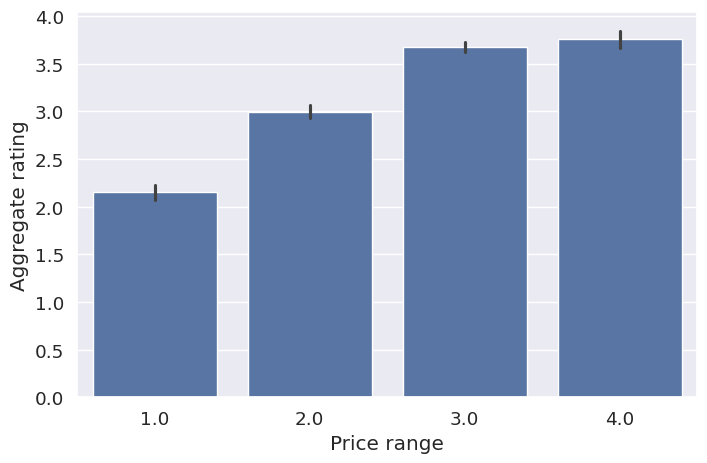

In [19]:
#plotting a graph for price range and Aggregate rating to check the switch to order feature.
sns.barplot(x="Price range", y='Aggregate rating', data=data_india)

The 'Switch to order menu' service is not provided by any of the restaurants that have been reviewed in Zomato. But this interestingly shows the general trend of ratings provided by the users. The lower price restaurants in general have worser ratings compared to the pricier ones. There is essentially little difference in the ratings of price categories 1 and 2.

### Cuisines provided by the restaurants
The above restaurants are a mix of single cusine and multi-cuisine restaurant. The rating of restaurants will be affected by the authenticity of the cuisine they are serving. I will first make a column of cusines that is served by the restaurants.

In [143]:
#function to count the number of couisines offered by a restaurant.
def cusines_count(text):
    x = text.split(',')
    return len(x)

In [149]:
#assigning the values to 'x' after applying the function cusines_count on Cuisines column in data_india dataframe.
x = data_india['Cuisines'].apply(cusines_count)

In [145]:
#renaming 'x' to No. of cuisines
x = x.rename("No. of cuisines")

In [146]:
x.name

'No. of cuisines'

In [147]:
#modifying the data_frame Data_india by adding 'x' that is a series of number of cuisines in a restaurant in the end of the dataframe with column name No. of cuisines
data_modified = pd.concat([data_india, x], axis= 1)
data_modified

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,No. of cuisines
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3.0,3.9,Yellow,Good,140.0,2
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2.0,3.5,Yellow,Good,71.0,2
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2.0,3.6,Yellow,Good,94.0,1
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2.0,4.0,Green,Very Good,87.0,1
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3.0,4.2,Green,Very Good,177.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4389,306505,2 Nice 2 Slice,1,New Delhi,"262, Deshbandhu Apartments, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.257658,28.538535,"Bakery, Desserts",...,No,No,No,No,3.0,3.2,Orange,Average,17.0,2
4390,302868,Aggarwal Bikaneri Sweets,1,New Delhi,"B-53, Main Road, Near Nirankari Bhawan, Kalkaj...",Kalkaji,"Kalkaji, New Delhi",77.251157,28.544169,"Mithai, Street Food",...,No,No,No,No,1.0,2.9,Orange,Average,11.0,2
4391,7383,Aggarwal Sweet Corner & Restaurant,1,New Delhi,"1, Krishna Market, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.255120,28.541534,"North Indian, South Indian, Chinese, Mithai",...,No,No,No,No,1.0,2.6,Orange,Average,38.0,4
4392,302793,Aggarwal Sweets India,1,New Delhi,"1666/1, Govindpuri Extension, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.260012,28.534517,"Mithai, Street Food",...,No,No,No,No,1.0,2.8,Orange,Average,9.0,2


<ipython-input-173-7217bbd1a8a6>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




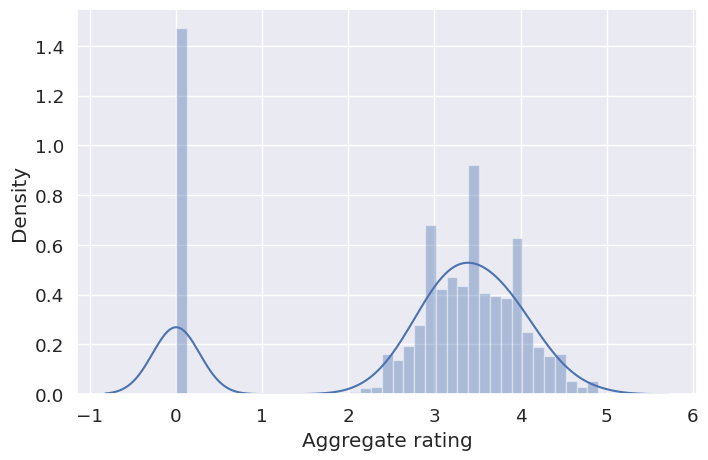

In [173]:
#Mean of all ratings
sns.distplot(data_modified['Aggregate rating']);

There are a lot of unrated restaurants in this dataset which would not contribute to understanding the dynamics of restaurant goers in India. We will remove all this data points to have a more representative sample. It might be possible to predict the ratings of those restaurants based on the characteristics of the restaurants that have already been rated.

Let us now remove the data points that do not have any votes or ratings

In [26]:
#creating a dataframe where only rated restaurants are present
data_rated_restaurants = data_modified[(data_modified['Aggregate rating']>0)&(data_modified['Votes']>0)]

In [27]:
data_rated_restaurants.shape

(3071, 22)

Let us have another look now at the distribution of aggregrate ratings among all restaurants.

<ipython-input-118-96ed09564f4f>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




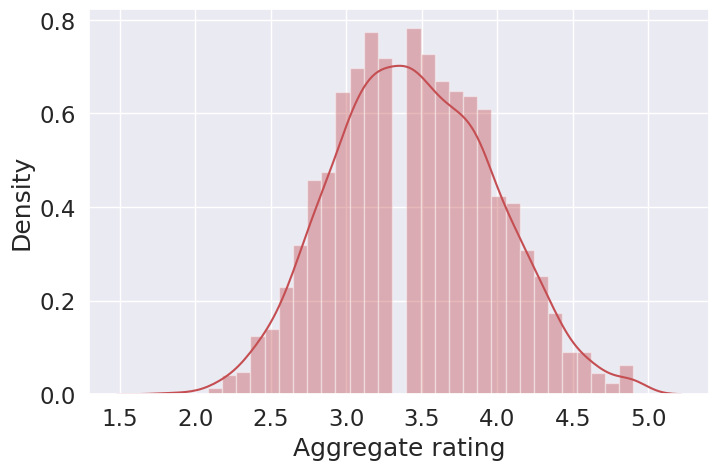

In [118]:
#again ploting the mean rating graph
sns.distplot(data_rated_restaurants['Aggregate rating'], color='r');

<Axes: xlabel='No. of cuisines', ylabel='Aggregate rating'>

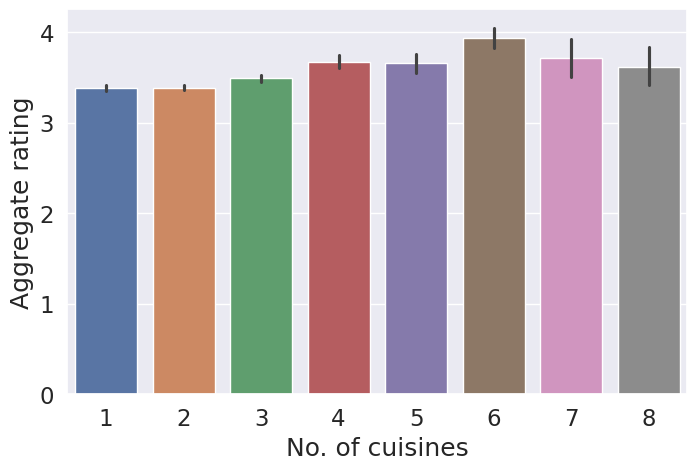

In [119]:
#ploting a graph showing no. of cuisines and aggregate rating
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', data= data_rated_restaurants, palette="deep" )

This is very interesting situation. It seems that contrary to my own expectations, it seems that multi-cusine restaurants in India seems to have a little better aggregrate rating. It would be interesting to see the distribution divided between the four price ranges

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

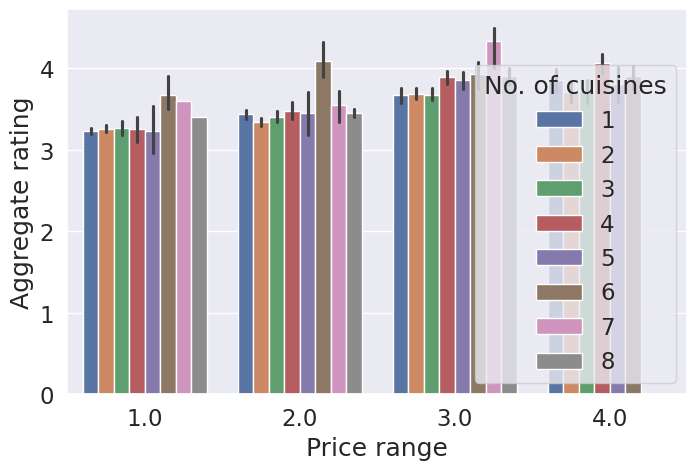

In [120]:
#ploting graph with price range to the aggregate rating on the basis of no. of cuisines
sns.barplot(x ="Price range", y = 'Aggregate rating', hue= 'No. of cuisines', data= data_rated_restaurants, palette="deep" )

The trend of the aggregate rating being better for multicuisine restaurant seems to be valid for all the price range of restaurants. Thus in India it is likely that if you have a multi-cuisine restaurant it would probably get better ratings. Additionally, the highest price category restaurants provide no more than 7 cuisines.


<Axes: xlabel='No. of cuisines', ylabel='Aggregate rating'>

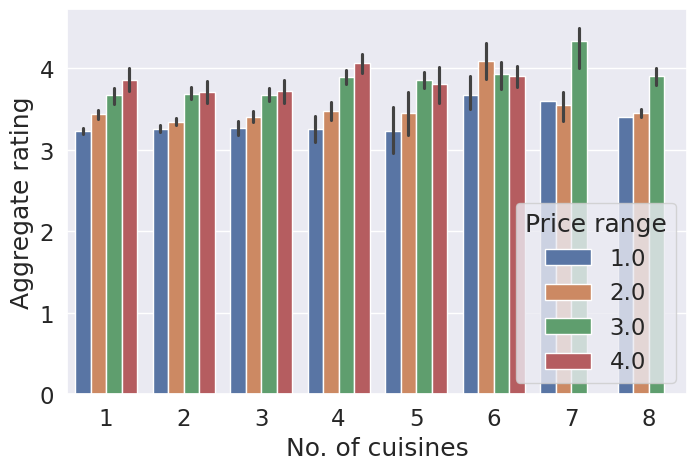

In [121]:
#ploting graph with no. of cuisines and aggregate rating on the basis of Price Range
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', hue="Price range" , data= data_rated_restaurants, palette="deep" )

We can infer from above that the aggregate rating of the restaurants tend to increase with the price range irrespective of the number of cuisines that they serve.

### Voting trends

In [32]:
data_rated_restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,No. of cuisines
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3.0,3.9,Yellow,Good,140.0,2
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2.0,3.5,Yellow,Good,71.0,2
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2.0,3.6,Yellow,Good,94.0,1
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2.0,4.0,Green,Very Good,87.0,1
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3.0,4.2,Green,Very Good,177.0,3


Another important parameter to know the is number of footfalls of each restaurants. However what we have here is the number of reviewers which is only proportional to the total number of footfalls over a given duration. Since the duration during which the reviews were obtained are not given, we will assume this to be the same for all restaurants as of now to have a general idea about the number of people who visit the restaurant. The number of footfalls per restaurant should also depend on the population of the city in which the restaurant is located, the location itself, cuisine etc. Curiously enough a better aggregate rating should also contribute to the number of footfalls.

<Axes: xlabel='Price range', ylabel='Votes'>

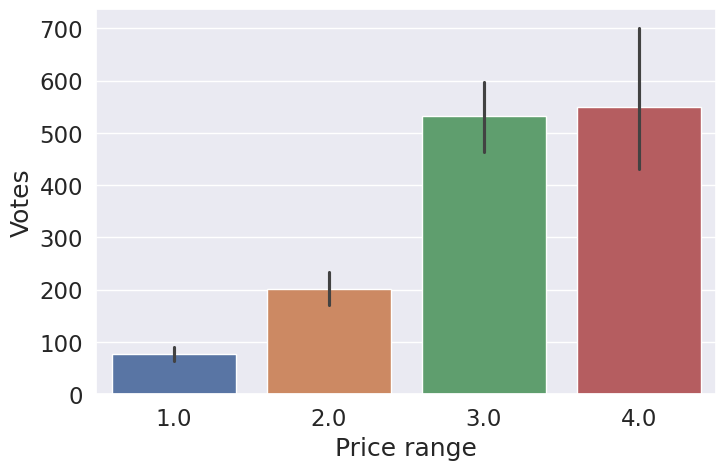

In [116]:
#ploting a graph with Price range and Votes.
sns.barplot(x ="Price range", y = 'Votes', data= data_rated_restaurants, palette="deep" )

The more pricier restaurants seems to have larger number of reviews which implies the pricier restaurants seems to have a better footfall. It might be also possible that people who visit these restaurants are more internet savvy and likely to leave a review. Let us look at the relation between average rating and number of votes:

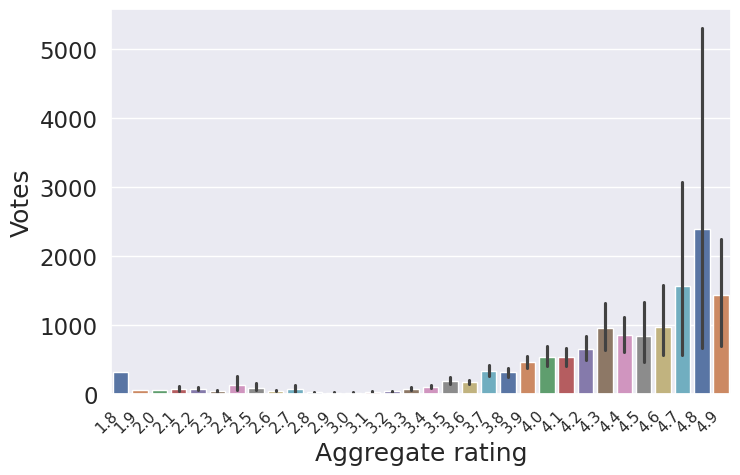

In [115]:
#adjusting the parameters for size and scaling and ploting graph between aggregate rating and votes.
sns.set(font_scale=1.5, rc={'figure.figsize':(8,5)})
sns.barplot(x = 'Aggregate rating', y = 'Votes', data = data_rated_restaurants, palette="deep")
plt.xticks(rotation = 45, ha = 'right',fontsize = 11 );

The above plot shows that the average votes received are disproportionately higher in the case of restaurants with higher ratings. Also the variability of footfalls is also large for the highly rated restaurants. This might be because there might be new restaurants which has better aggregate rating. However since the data does not mention the period during which the restaurants were obtained this is just a speculation. The location of the restaurant, how easily it is accessible by public transport, the population density in the region where it is located, whether it is closer to the center of the city etc.

<Axes: xlabel='No. of cuisines', ylabel='Votes'>

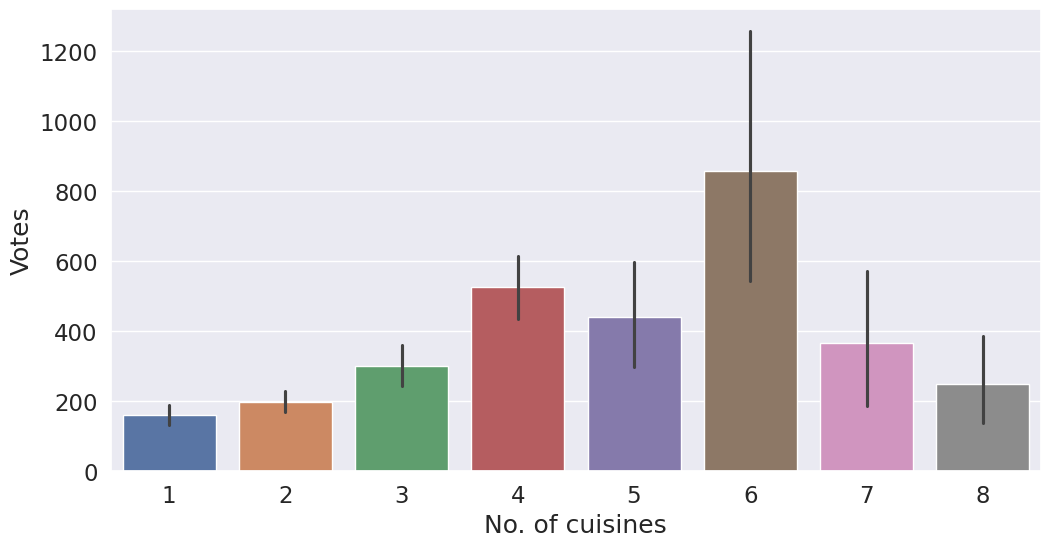

In [113]:
#ploting graph between no. of cuisines and votes
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})
sns.barplot(x = 'No. of cuisines',y =  'Votes', data= data_rated_restaurants, palette="deep")

The average votes received are also higher for restaurants that are multi-cuisine. It would be also be interesting to see the voting amoung different number of cuisines provided.

<ipython-input-114-6f39be382415>:1: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



<Axes: xlabel='No. of cuisines', ylabel='Votes'>

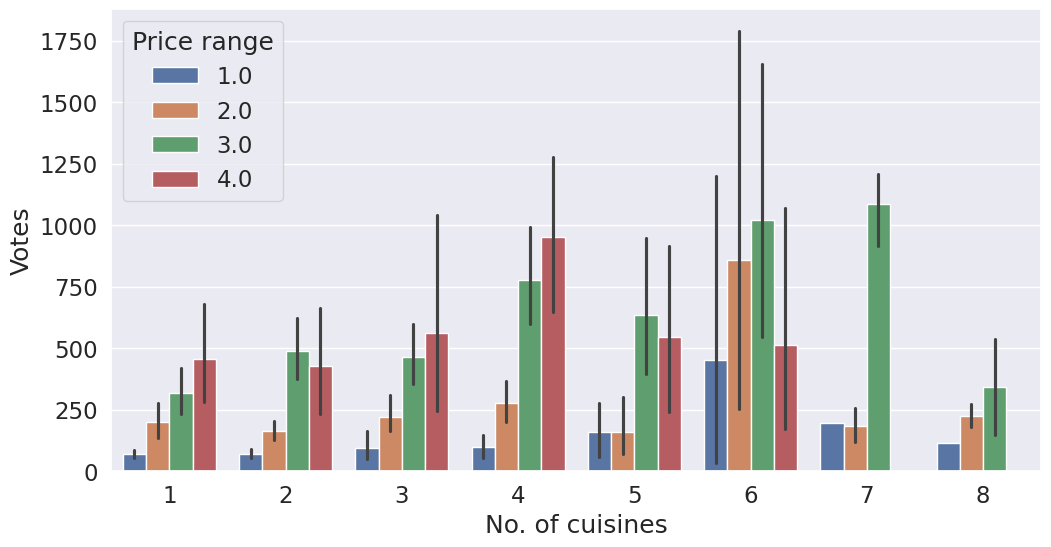

In [114]:
#ploting graph between no. of cuisine and votes on the basis of Price range.
sns.barplot(x ='No. of cuisines',y = 'Votes', hue= 'Price range', data= data_rated_restaurants, palette=sns.color_palette("deep"))

### Cities
It would also be interesting to know the cities in India where these restaurants are located.

In [40]:
#printing cities with there counts.
print(data_rated_restaurants['City'].unique())
print(data_rated_restaurants['City'].nunique())

['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi']
32


It would be interesting to see which in which people use Zomato to rate the restaurants. The total number of votes in each city could also be a measure of the popularity of Zomato in that city (or state in which the city is located).

### Most Popular cuisines

In the above restaurants we have both single cuisine and multi-cuisine restaurants. We first need to make the list of all available cuisines across all restaurants. I will try to generate the list of cuisines that are provided by all the restaurants above.

In [174]:
#creating an empty list of cuisines and a variable list_of_cuisines to assign values of 9th column from data_modified data frame.
cuisine = []
list_of_cuisines = data_modified.iloc[:,9]
len(list_of_cuisines)

3770

In [193]:
#iterating in the list_of_cuisines with x and spliting the values of x with comma and appending them to cuisines list that is created above.
for x in list_of_cuisines:
    y = x.split(', ')
    for i in y:
        if i not in cuisine:
            cuisine.append(i)
        else:
            pass


In [192]:
#printing the cuisine list with total no. of items in the cuisines list.
print(cuisine, 'total no. of cuisines {}'.format(len(cuisine)))

[] total no. of cuisines 0


Above you can see the list of all cuisines that are served by the restaurants that have been rated by Zomato. There are in total 90 types of cuisines available in total. It would be really interesting to see which cuisines are the most popular among restaurant goers according to Zomato. This is a little challenging as seen from the analysis before as the most popular restaurants are most likely a multi-cuisine restaurant. It is most likely that a combination of particular cuisines seems to be the key to a successful rating. It is also possible that the popular multi-cuisine restaurants have one or two common cuisines. Cuisines served can definitely provide a clue to understanding the popularity of a restaurant.

In [191]:
#assigning the all the values of column aggregate rating to the variable list_ratings for the purpose of finding average rating.
list_ratings = data_modified.loc[:,'Aggregate rating']
len(list_ratings)

3770

In [201]:
#finding the average rating with the below program.
ratings_per_cuisine = []
counts_per_cuisine = []
for cusi in cuisine:
    count = 0
    total_rating = 0
    for cuisines, ratings in zip(list_of_cuisines, list_ratings):
        if cusi in cuisines.split(', '):
            count+=1
            total_rating += ratings
        else:
            pass
    ratings_per_cuisine.append(total_rating/count)
    counts_per_cuisine.append(count)


In [202]:
#creating a small dataframe named ratings_cuisines.
ratings_cuisines = pd.DataFrame({'Cuisines':cuisine, 'Average Rating':ratings_per_cuisine, 'Popularity':counts_per_cuisine} )
ratings_cuisines

,Cuisines,Average Rating,Popularity
0,North Indian,NaN,1705
1,Mughlai,2.788345,429
2,Rajasthani,3.093750,16
3,Chinese,2.793546,1131
4,European,3.957746,71
...,...,...,...
81,Malwani,3.500000,1
82,Cuisine Varies,0.000000,1
83,Turkish,3.575000,4
84,Moroccan,1.150000,2


In [203]:
ratings_cuisines.head()

,Cuisines,Average Rating,Popularity
0,North Indian,NaN,1705
1,Mughlai,2.788345,429
2,Rajasthani,3.093750,16
3,Chinese,2.793546,1131
4,European,3.957746,71


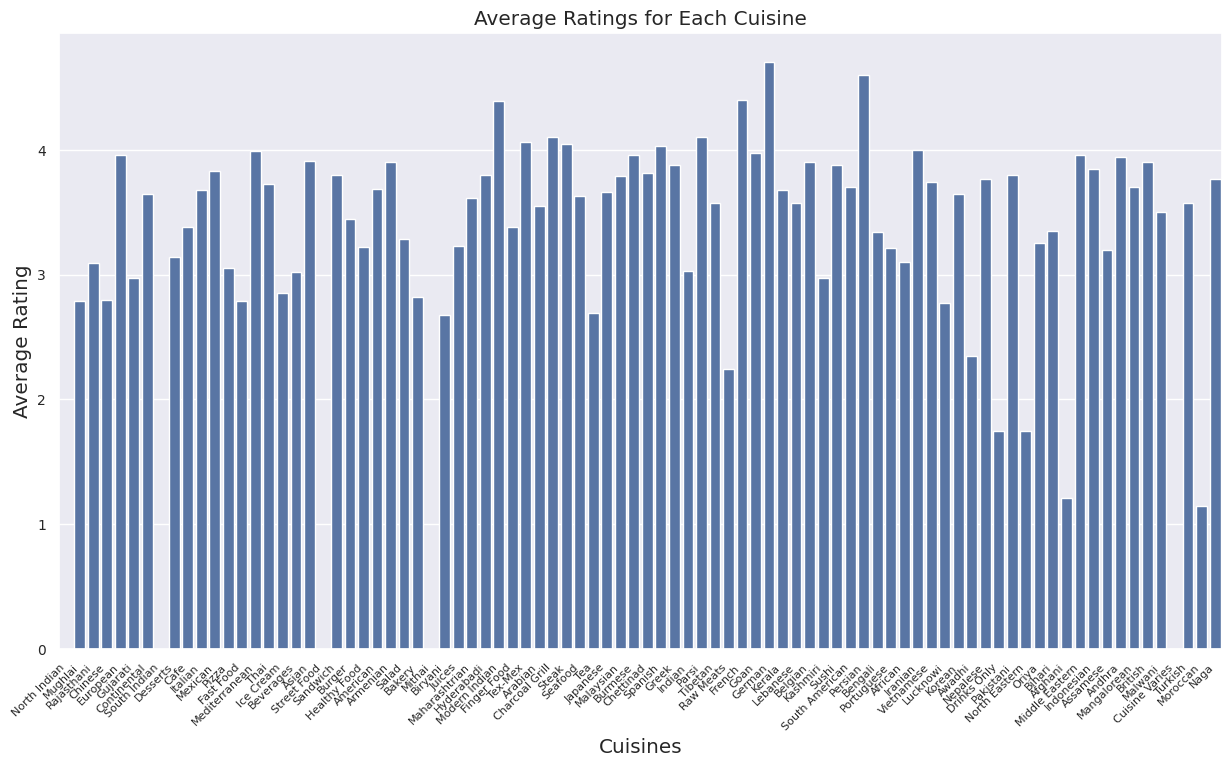

In [204]:
#ploting the final graph for cuisines and average rating
plt.figure(figsize=(15, 8))
sns.barplot(x='Cuisines', y='Average Rating', data=ratings_cuisines,dodge = True, color = 'b')
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Cuisine')
plt.xticks(rotation = 45,ha = 'right', fontsize = 8)
plt.yticks(fontsize = 10)
plt.show()

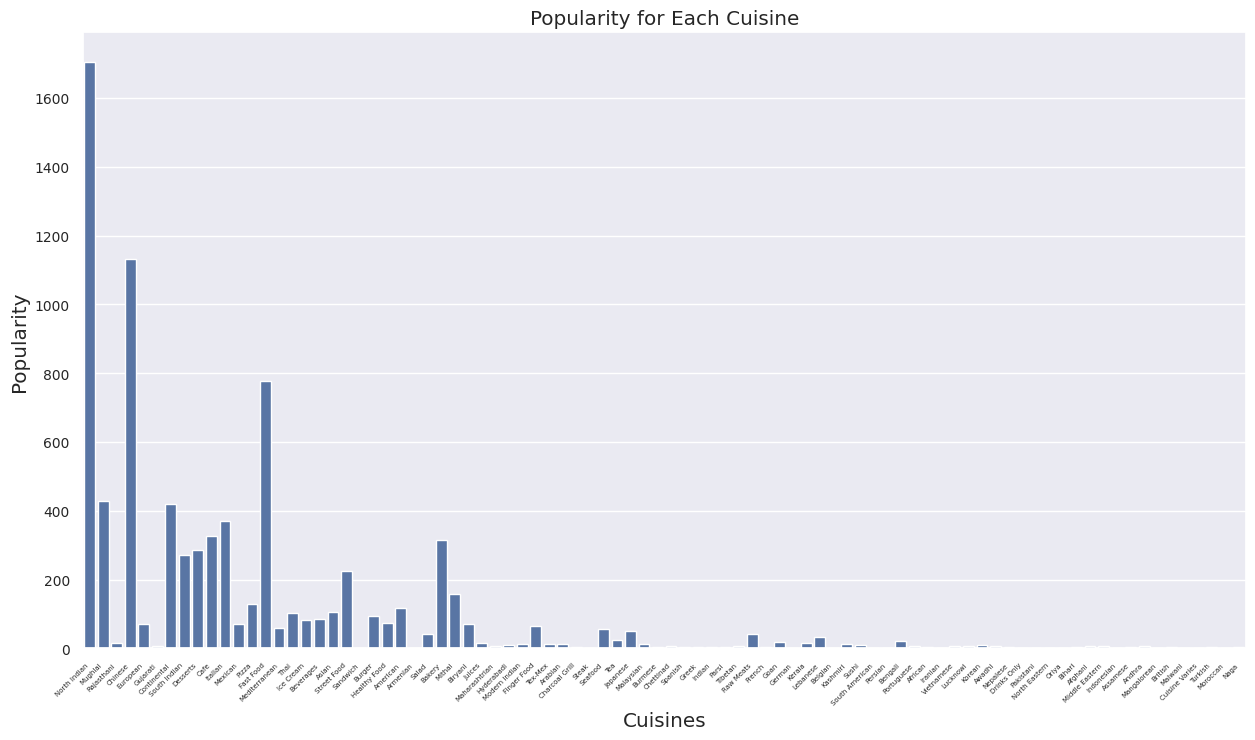

In [221]:
#ploting the final graph for cuisines and popularity basis.
plt.figure(figsize=(15, 8))
sns.barplot(x='Cuisines', y='Popularity',data=ratings_cuisines)
plt.xlabel('Cuisines')
plt.ylabel('Popularity')
plt.title('Popularity for Each Cuisine')
plt.xticks(rotation = 45, ha='right', fontsize = 5)
plt.yticks(fontsize = 10)
plt.show()

The above barplot gives and idea about the ratings per cuisine. But it would be more interesting know which type of cuisine is most likely consumed by the people rating on Zomato. But with this data we have have to conclude that North Indian and Chinese cuisines are way more popular than other cuisines in India.
